In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

The datset contains the following fields:

            * key - a unique identifier for each trip
            * fare_amount - the cost of each trip in usd
            * pickup_datetime - date and time when the meter was engaged
            * passenger_count - the number of passengers in the vehicle (driver entered value)
            * pickup_longitude - the longitude where the meter was engaged
            * pickup_latitude - the latitude where the meter was engaged
            * dropoff_longitude - the longitude where the meter was disengaged
            * dropoff_latitude - the latitude where the meter was disengaged
            

In [ ]:
df = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Data Cleaning

- col 	Unnamed: 0 & key is not important so i will drop it

In [ ]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('*******************************')

fare_amount
fare_amount
6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: count, Length: 1244, dtype: int64
*******************************
pickup_datetime
pickup_datetime
2014-04-13 18:19:00 UTC    4
2010-03-14 12:00:00 UTC    4
2009-02-12 12:46:00 UTC    4
2011-02-18 18:55:00 UTC    3
2009-03-12 17:12:00 UTC    3
                          ..
2013-03-08 07:16:00 UTC    1
2013-05-17 21:33:31 UTC    1
2009-10-24 04:05:00 UTC    1
2013-05-16 16:12:00 UTC    1
2010-05-15 04:08:00 UTC    1
Name: count, Length: 196629, dtype: int64
*******************************
pickup_longitude
pickup_longitude
 0.000000     3786
-73.137393      72
-73.982600      20
-73.987167      20
-73.982210      20
              ... 
-73.878872       1
-73.925593       1
-73.976158       1
-73.789910       1
-73.997124       1
Name: count, Length: 71066, dtype: int64
******************************

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
px.histogram(df, x='fare_amount', width=700, height=500)

In [ ]:
df[df['fare_amount'].values <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,0.00,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
87467,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1


In [ ]:
df.drop(df[df['fare_amount'].values <= 0].index  , inplace= True   )

In [ ]:
df[df['fare_amount'].values <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


{'whiskers': [<matplotlib.lines.Line2D at 0x7a79b5f7fee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a79b5d242e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a79b5f7ece0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a79b5d268c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a79b5d24f10>],
 'means': []}

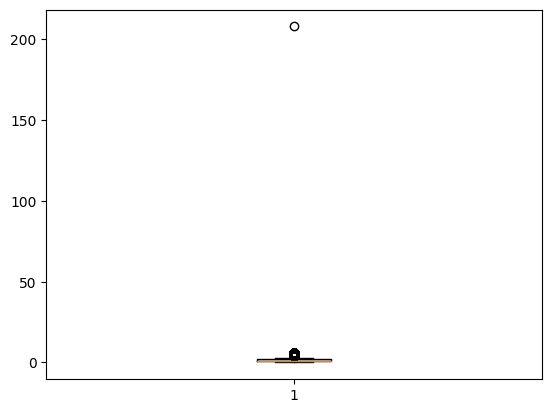

In [ ]:
plt.boxplot(df['passenger_count'])

In [ ]:
df[df['passenger_count'] >6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [ ]:
df.drop(df[df['passenger_count'] >6].index, inplace=True)

In [ ]:
df[df['passenger_count'] >6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [ ]:
px.box(df, x='pickup_latitude', width=700, height=500)

In [ ]:
df.sample()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
51761,10.0,2015-03-21 09:40:44 UTC,-73.98336,40.741592,-73.999046,40.723076,1


In [ ]:
def filter_latitude(val):
    if val < -90 or val > 90:
        return np.nan
    else:
        return val

def filter_longitude(val):
    if val < -180 or val > 180:
        return np.nan
    else:
        return val


In [ ]:
df['pickup_longitude'] = df['pickup_longitude'].apply(filter_longitude)
df['pickup_latitude'] = df['pickup_latitude'].apply(filter_latitude)
df['dropoff_longitude'] = df['dropoff_longitude'].apply(filter_longitude)
df['dropoff_latitude'] = df['dropoff_latitude'].apply(filter_latitude)

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# calculate the distance between pickup and dropoff using geopy library
from geopy.distance import great_circle

def distance_km(x):
    pickup = (x['pickup_latitude'], x['pickup_longitude'])
    dropoff = (x['dropoff_latitude'], x['dropoff_longitude'])
    return great_circle(pickup, dropoff).km

In [ ]:
df['distance_km'] = df.apply(lambda x: distance_km(x), axis=1)

In [ ]:
df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'] , inplace=True , axis= 1)

In [ ]:
df.describe()

,fare_amount,passenger_count,distance_km
count,199964.000000,199964.000000,199964.000000
mean,11.362542,1.683458,20.475791
std,9.897195,1.306932,378.657163
min,0.010000,0.000000,0.000000
25%,6.000000,1.000000,1.215337
50%,8.500000,1.000000,2.120977
75%,12.500000,2.000000,3.874819
max,499.000000,6.000000,8782.911013


In [ ]:
df[df['distance_km']==0]

,fare_amount,pickup_datetime,passenger_count,distance_km
5,4.9,2011-02-12 02:27:09 UTC,1,0.0
7,2.5,2012-12-11 13:52:00 UTC,1,0.0
11,8.5,2011-05-23 22:15:00 UTC,1,0.0
48,56.8,2013-01-03 22:24:41 UTC,1,0.0
65,6.0,2014-05-05 19:27:00 UTC,1,0.0
...,...,...,...,...
199880,6.5,2014-02-22 06:45:46 UTC,1,0.0
199883,12.5,2012-09-10 17:39:00 UTC,2,0.0
199917,4.5,2013-06-24 22:17:43 UTC,1,0.0
199932,24.9,2011-03-22 13:59:00 UTC,5,0.0


In [ ]:
df.drop(df[df['distance_km']==0].index , inplace= True )

<Axes: >

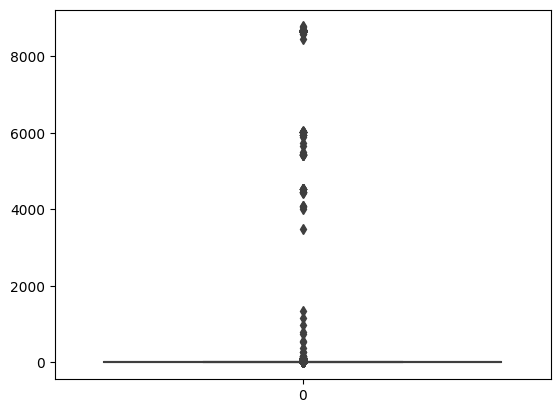

In [ ]:
sns.boxplot(df['distance_km'])

In [ ]:
## handileng the outliers with pandas
q1 = df['distance_km'].quantile(0.25)
q3 = df['distance_km'].quantile(0.75)
iqr = q3 - q1
lower =  q1 - 1.5 * iqr
upper = q3 + 1.5 *iqr

In [ ]:
df_clean0 = df[(df['distance_km'] >= lower) & (df['distance_km']<=upper) ]

In [ ]:
df_clean0.describe()

,fare_amount,passenger_count,distance_km
count,177961.000000,177961.000000,177961.000000
mean,9.240175,1.682026,2.483259
std,5.466532,1.306509,1.688242
min,0.010000,0.000000,0.000084
25%,5.700000,1.000000,1.217376
50%,8.000000,1.000000,2.005922
75%,11.300000,2.000000,3.318405
max,499.000000,6.000000,7.976771


In [ ]:
df_clean0.drop(df_clean0[df_clean0['distance_km'] < 1].index, inplace=True)


In [ ]:
## handileng the outliers with pandas
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1
lower =  q1 - 1.5 * iqr
upper = q3 + 1.5 *iqr

In [ ]:
df_clean = df_clean0[(df_clean0['fare_amount'] >= lower) & (df_clean0['fare_amount']<=upper) ]


In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
df_clean.shape

(144584, 4)

In [ ]:
df_clean.sample()

,fare_amount,pickup_datetime,passenger_count,distance_km
196056,15.3,2009-01-05 11:29:00 UTC,5,6.73863


In [ ]:
# convert the col pickup_datetime type to date and split it to Year and Month
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'] )

In [ ]:
# get the day, weekday, month, year, hour from pickup_datetime
df_clean['day'] = df_clean['pickup_datetime'].dt.day_name()
df_clean['weekday'] = df_clean['pickup_datetime'].dt.weekday
df_clean['month'] = df_clean['pickup_datetime'].dt.month_name()
df_clean['year'] = df_clean['pickup_datetime'].dt.year
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour

# drop pickup_datetime
df_clean.drop('pickup_datetime', axis=1, inplace=True)

In [ ]:
df_clean.head()

,fare_amount,passenger_count,distance_km,day,weekday,month,year,hour
0,7.5,1,1.683325,Thursday,3,May,2015,19
1,7.7,1,2.457593,Friday,4,July,2009,20
2,12.9,1,5.036384,Monday,0,August,2009,21
3,5.3,3,1.661686,Friday,4,June,2009,8
4,16.0,5,4.475456,Thursday,3,August,2014,17


In [ ]:
df_clean['year'].value_counts()

year
2012    23563
2011    23408
2009    22437
2013    22334
2010    22017
2014    21164
2015     9661
Name: count, dtype: int64

In [ ]:
df_clean.describe()

,fare_amount,passenger_count,distance_km,weekday,year,hour
count,144584.000000,144584.000000,144584.000000,144584.000000,144584.000000,144584.000000
mean,9.577319,1.684827,2.784389,3.063707,2011.715681,13.583965
std,3.837949,1.307014,1.551391,1.947426,1.851541,6.555934
min,0.010000,0.000000,1.000037,0.000000,2009.000000,0.000000
25%,6.500000,1.000000,1.578035,1.000000,2010.000000,9.000000
50%,8.500000,1.000000,2.316201,3.000000,2012.000000,14.000000
75%,11.700000,2.000000,3.584201,5.000000,2013.000000,19.000000
max,22.200000,6.000000,7.976727,6.000000,2015.000000,23.000000


In [ ]:
df_clean.drop(df_clean[df_clean['fare_amount'] > 200].index, inplace=True)
df_clean.drop(df_clean[df_clean['fare_amount'] < 1].index, inplace=True)

In [ ]:
df_clean.describe()

,fare_amount,passenger_count,distance_km,weekday,year,hour
count,144583.000000,144583.000000,144583.000000,144583.000000,144583.000000,144583.000000
mean,9.577385,1.684832,2.784359,3.063728,2011.715693,13.583934
std,3.837879,1.307017,1.551354,1.947416,1.851542,6.555946
min,2.500000,0.000000,1.000037,0.000000,2009.000000,0.000000
25%,6.500000,1.000000,1.578032,1.000000,2010.000000,9.000000
50%,8.500000,1.000000,2.316199,3.000000,2012.000000,14.000000
75%,11.700000,2.000000,3.584194,5.000000,2013.000000,19.000000
max,22.200000,6.000000,7.976727,6.000000,2015.000000,23.000000


In [ ]:
df_clean.describe(include='O')

,day,month
count,144583,144583
unique,7,12
top,Saturday,May
freq,22485,13645


<Axes: xlabel='fare_amount', ylabel='Density'>

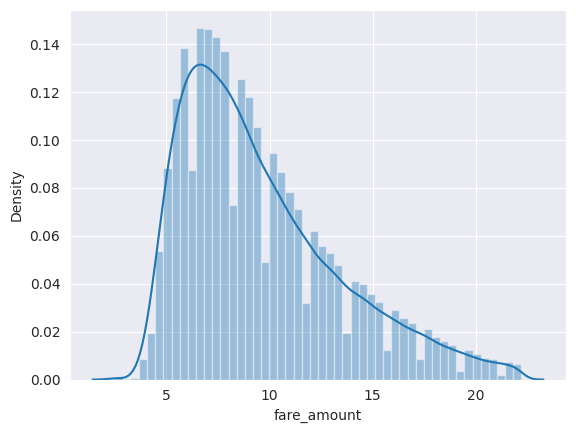

In [ ]:
sns.set_style(style='darkgrid')
sns.distplot(df_clean['fare_amount'], hist=True, kde=True)

## Preprocessing

In [ ]:
# data spliting
x = df_clean.drop('fare_amount', axis=1)
y = df_clean['fare_amount']

In [ ]:
# Splitting the dataset into the Train set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
cat_cols = x_train.select_dtypes(include='O').columns.tolist()
num_cols = x_train.select_dtypes(exclude='O').columns.tolist()

In [ ]:
from sklearn.preprocessing import  RobustScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps = [
    ('scaler' , RobustScaler())
])

#preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('enc',OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessing = ColumnTransformer(
    transformers=[
        ('num' , numerical_transformer , num_cols),
        ('cat',categorical_transformer ,cat_cols)
    ]

)



In [ ]:
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(x_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 2.1796412650067065
R2: 0.6742779955265409


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Split your data into training and testing sets and define preprocessing steps
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Model Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression RMSE:", rmse_rf)
print("Random Forest Regression R2:", r2_rf)


Random Forest Regression RMSE: 2.140627057379806
Random Forest Regression R2: 0.6858340762689358
